In [1]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()

Code for Creating Visualisations on HAM1000 Dataset

In [35]:
df = pd.read_csv('HAM10000_metadata.csv')

In [36]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
mapping = {'mel': 'mel', 'bcc':'bcc', 'nv':'others', 'bkl':'others', 'akiec':'others','vasc':'others','df':'others'}

In [5]:
chart = df['dx'].value_counts()

In [43]:
age = df['age'].value_counts()

In [44]:
age

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [ ]:
chart.columns =['Class', 'Count']

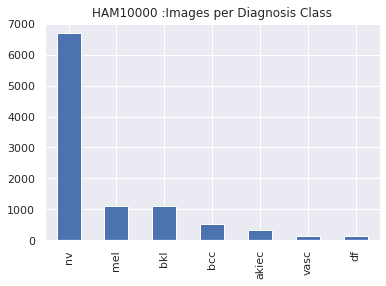

In [7]:
chart.plot.bar(x = "class" ,y = "Count" ,title  = "HAM10000 :Images per Diagnosis Class")
plot.show(block=True)

In [45]:
age = pd.DataFrame(data =age)

In [48]:
age = age.sort_index()

In [52]:
age['Age Group'] = age.index

In [55]:
age.columns = ['Count', 'Age Group']

In [56]:
age

,Count,Age Group
0.0,39,0.0
5.0,86,5.0
10.0,41,10.0
15.0,77,15.0
20.0,169,20.0
25.0,247,25.0
30.0,464,30.0
35.0,753,35.0
40.0,985,40.0
45.0,1299,45.0


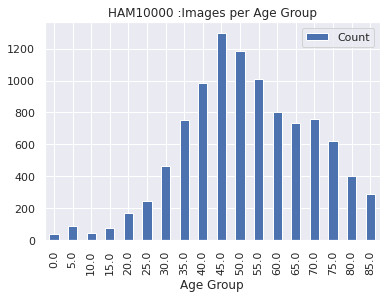

In [57]:
age.plot.bar(x = "Age Group" ,y = "Count" ,title  = "HAM10000 :Images per Age Group")
plot.show(block=True)

In [62]:
area = df['localization'].value_counts()

In [63]:
area = pd.DataFrame(data = area )

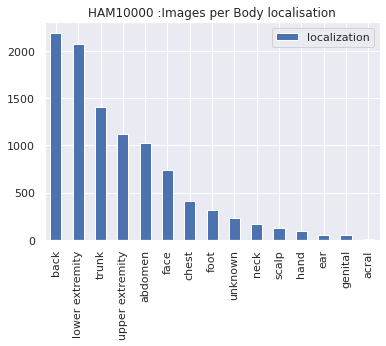

In [67]:
area.plot.bar(title  = "HAM10000 :Images per Body localisation" )
plot.show(block=True)

In [68]:
diag = df['dx_type'].value_counts()

In [69]:
diag = pd.DataFrame(data = diag )

In [71]:
diag['Diagnosis Type'] = diag['dx_type']

In [76]:
diag = diag.drop(['dx_type'] , axis =1)

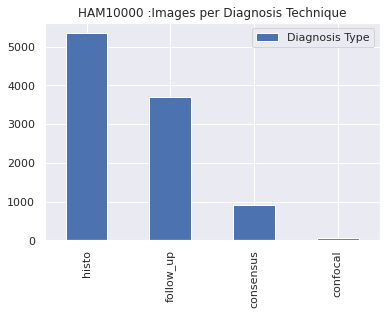

In [77]:
diag.plot.bar(title  = "HAM10000 :Images per Diagnosis Technique" )
plot.show(block=True)

In [78]:
gender  = df['sex'].value_counts()

In [79]:
gender = pd.DataFrame(data = gender )

In [82]:
gender['Gender'] = gender['sex']

In [83]:
gender = gender.drop(['sex'] , axis =1)

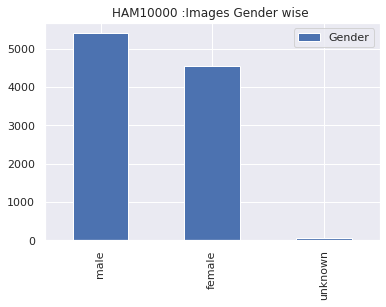

In [84]:
gender.plot.bar(title  = "HAM10000 :Images Gender wise " )
plot.show(block=True)

Code for Extracting PAD-UFES-20 Images


In [2]:
skin_data = pd.read_csv('/home/jupyter/PAD-UFES-20/metadata.csv')

In [3]:
skin_data['diagnostic'].value_counts()

BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: diagnostic, dtype: int64

In [4]:
label = skin_data['diagnostic'].unique().tolist()
print(label)
label_images = []

['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL']


In [5]:
dest_dir = '/home/jupyter/PAD-UFES-20/images_by_class/'
data_dir = '/home/jupyter/PAD-UFES-20/images/'

In [10]:
for i in label:
    print(dest_dir + str(i) + '/')
    os.mkdir(dest_dir + str(i))
    sample = skin_data[skin_data['diagnostic'] == i]['img_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + '/' + id ), (dest_dir + str(i) + '/' + id ))
    label_images = []

/home/jupyter/PAD-UFES-20/images_by_class/NEV/
/home/jupyter/PAD-UFES-20/images_by_class/BCC/
/home/jupyter/PAD-UFES-20/images_by_class/ACK/
/home/jupyter/PAD-UFES-20/images_by_class/SEK/
/home/jupyter/PAD-UFES-20/images_by_class/SCC/
/home/jupyter/PAD-UFES-20/images_by_class/MEL/
